In [1]:
# import the libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline
from pylab import rcParams

# style the charts
rcParams['figure.figsize'] = 10, 5
rcParams['font.size'] = 20
rcParams['figure.dpi'] = 100
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['patch.edgecolor'] = 'white'
rcParams['font.family'] = 'StixGeneral'

# style the tables
pd.set_option("display.max_rows",15)
pd.set_option("display.max_columns",15)

# read all the CSV files one by one and store them in a list
dfs = []

for i in range(1, 8):
    dfs.append(pd.read_csv("../data/PM_estimation/SKOMOBO-dust" + str(i) +".csv", index_col=0, parse_dates=True))

# join up all the dataframes in the list into one huge dataframe
all_data = pd.concat(dfs)

# change the index so that it is based on the date and time and rearrange the columns so that equipment ID comes first
# variable and value
all_data = all_data.set_index(pd.DatetimeIndex(all_data.DT.values))[["EQM_ID", "variable", "value"]]

In [2]:
# extract the PM10 dustrack data and store it
DustTrackPM10 = all_data[all_data["EQM_ID"] == "PM10DT"]

# extract the PM2.5 dustrack data and store it
DustTrackPM2_5 = all_data[all_data["EQM_ID"] == "PM2.5DT"]

# create a list of box names like SKOMOBO, SKOMOBO1, SKOMOBO2 etc
ids = ["SKOMOBO"] + ["SKOMOBO" + str(i) for i in range(1, 8)]

# extract all the skomobos data
Skomobos = all_data[all_data["EQM_ID"].isin(ids)]

# isolate PM10 data and PM2.5 data
SkomoboPM10 = Skomobos[Skomobos["variable"] == "PM10"]
SkomoboPM2_5 = Skomobos[Skomobos["variable"] == "PM2.5"]

In [3]:
SkomoboPM10["value"] = SkomoboPM10["value"] / 1000
SkomoboPM2_5["value"] = SkomoboPM2_5["value"] / 1000

C:\Users\Ryan\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Ryan\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [4]:
# join the dataframes
comparisonPM10 = SkomoboPM10.join(DustTrackPM10["value"], rsuffix="_dustrack").dropna()[["EQM_ID", "value", "value_dustrack"]]
comparisonPM2_5 = SkomoboPM2_5.join(DustTrackPM2_5["value"], rsuffix="_dustrack").dropna()[["EQM_ID", "value", "value_dustrack"]]

# change column names
comparisonPM10 = comparisonPM10.rename(columns={"value": "skomobo", "value_dustrack": "dustrack"})
comparisonPM2_5 = comparisonPM2_5.rename(columns={"value": "skomobo", "value_dustrack": "dustrack"})
comparisonPM10

,EQM_ID,skomobo,dustrack
2017-05-12 17:31:00,SKOMOBO,0.000,0.011
2017-05-12 17:32:00,SKOMOBO,0.000,0.012
2017-05-12 17:33:00,SKOMOBO,0.000,0.013
2017-05-12 17:34:00,SKOMOBO,0.000,0.013
2017-05-12 17:35:00,SKOMOBO,0.001,0.012
2017-05-12 17:36:00,SKOMOBO,0.001,0.009
2017-05-12 17:37:00,SKOMOBO,0.001,0.011
...,...,...,...
2017-07-13 11:59:00,SKOMOBO6,0.512,0.039
2017-07-13 12:00:00,SKOMOBO1,19.712,0.036


In [5]:
from sklearn.ensemble import IsolationForest

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
trainPM10, testPM10 = train_test_split(comparisonPM10)

In [8]:
trainPM10["dust_diff"] = trainPM10["skomobo"] - trainPM10["skomobo"].shift(-1)
trainPM10 = trainPM10.fillna(0)
testPM10["dust_diff"] = testPM10["skomobo"] - testPM10["skomobo"].shift(-1)
testPM10 = testPM10.fillna(0)

C:\Users\Ryan\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Ryan\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


Think that including diff is skewing it, remove and calculate diff once cleaned

In [9]:
PM10OutlierDetector = IsolationForest(contamination=0.18).fit(trainPM10["skomobo"].values.reshape(-1,1))

# train on a train test split

In [10]:
trainPM10["is_inlier"] = PM10OutlierDetector.predict(trainPM10["skomobo"].values.reshape(-1,1))
testPM10["is_inlier"] = PM10OutlierDetector.predict(testPM10["skomobo"].values.reshape(-1,1))

In [11]:
len(trainPM10[trainPM10["is_inlier"] == 1]["skomobo"]) / float(len(trainPM10["skomobo"]))

0.8198216980382813

In [12]:
len(testPM10[testPM10["is_inlier"] == 1]["skomobo"]) / float(len(testPM10["skomobo"]))

0.8216338565089198

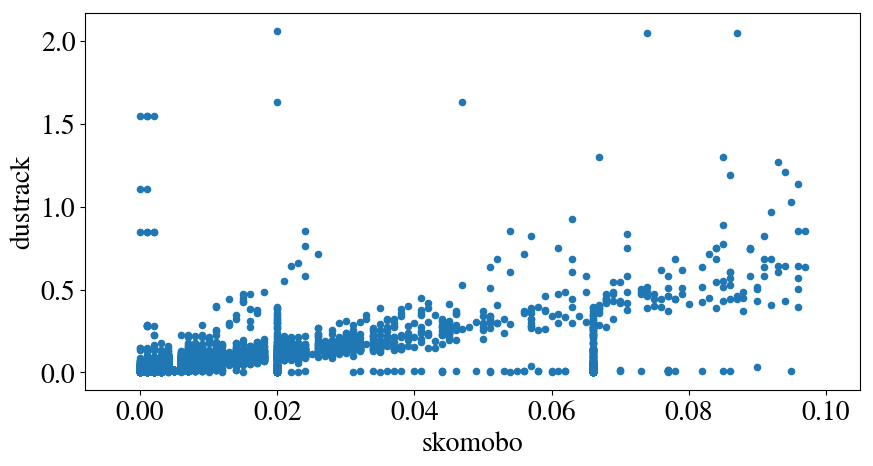

In [13]:
trainPM10[trainPM10["is_inlier"] == 1].plot(x="skomobo", y="dustrack", kind="scatter")

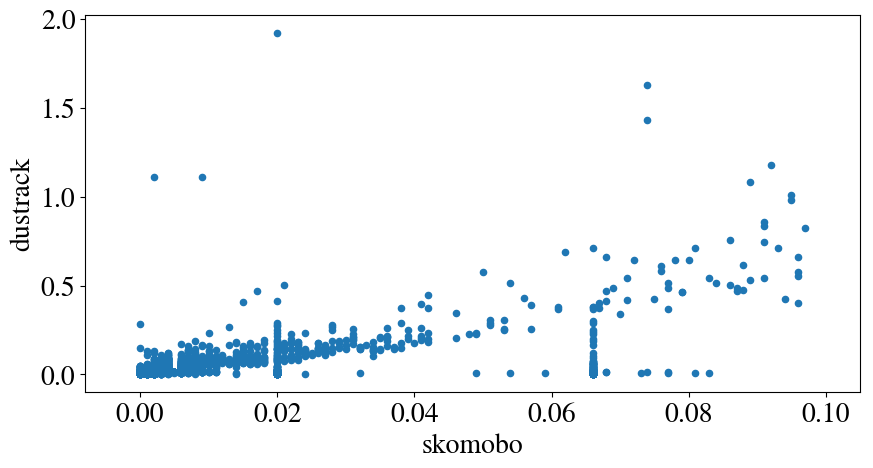

In [14]:
testPM10[testPM10["is_inlier"] == 1].plot(x="skomobo", y="dustrack", kind="scatter")

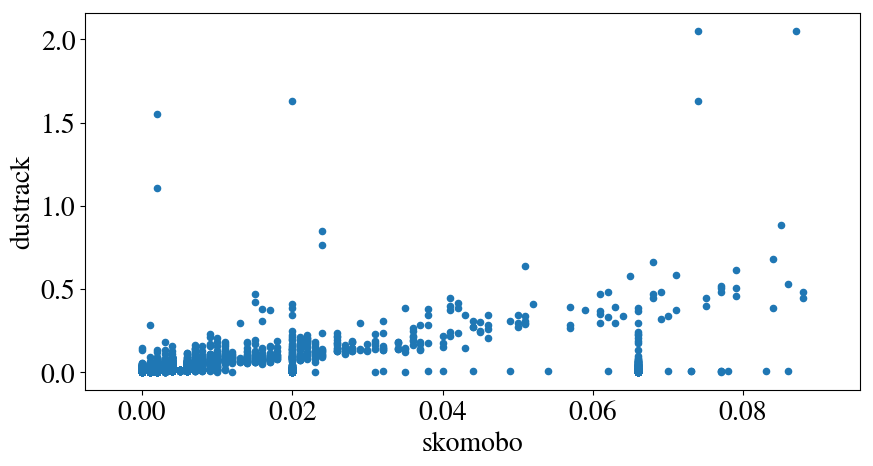

In [52]:
testPM10[testPM10["is_inlier"] == 1].plot(x="skomobo", y="dustrack", kind="scatter")

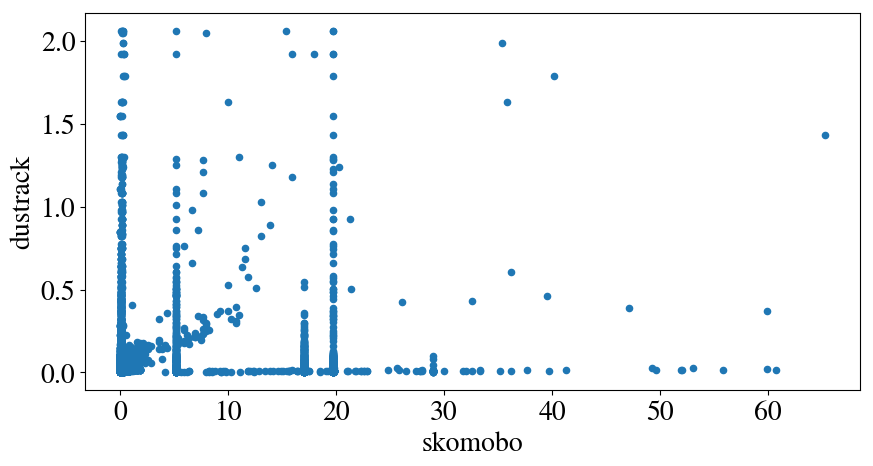

In [32]:
trainPM10.plot(x="skomobo", y="dustrack", kind="scatter")

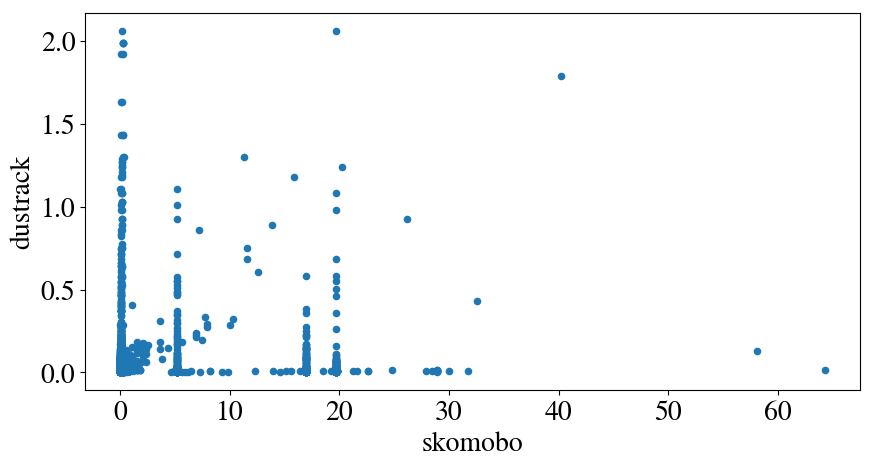

In [15]:
testPM10.plot(x="skomobo", y="dustrack", kind="scatter")

In [16]:
from sklearn.ensemble import GradientBoostingRegressor

In [17]:
cleanTrainPM10 = trainPM10[trainPM10["is_inlier"] == 1].copy()

In [25]:
modelPM10 = GradientBoostingRegressor(random_state=123).fit(cleanTrainPM10[["skomobo", "dust_diff"]], cleanTrainPM10["dustrack"])
modelPM10.score(cleanTrainPM10[["skomobo", "dust_diff"]], cleanTrainPM10["dustrack"])

0.58565567952311515

In [20]:
from sklearn.ensemble import BaggingRegressor

In [29]:
modelPM10 = BaggingRegressor(random_state=123).fit(cleanTrainPM10[["skomobo", "dust_diff"]], cleanTrainPM10["dustrack"])
modelPM10.score(cleanTrainPM10[["skomobo", "dust_diff"]], cleanTrainPM10["dustrack"])

0.63412002614016427

In [28]:
modelPM10 = BaggingRegressor(random_state=123).fit(cleanTrainPM10[["skomobo"]], cleanTrainPM10["dustrack"])
modelPM10.score(cleanTrainPM10[["skomobo"]], cleanTrainPM10["dustrack"])

0.56239351622128719

In [30]:
cleanTrainPM10["prediction"] = modelPM10.predict(cleanTrainPM10[["skomobo", "dust_diff"]])

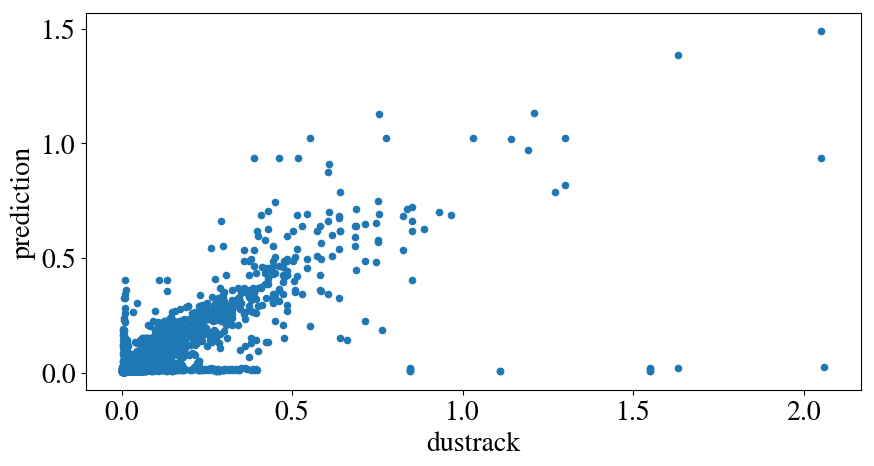

In [31]:
cleanTrainPM10.plot(x="dustrack", y="prediction", kind="scatter")

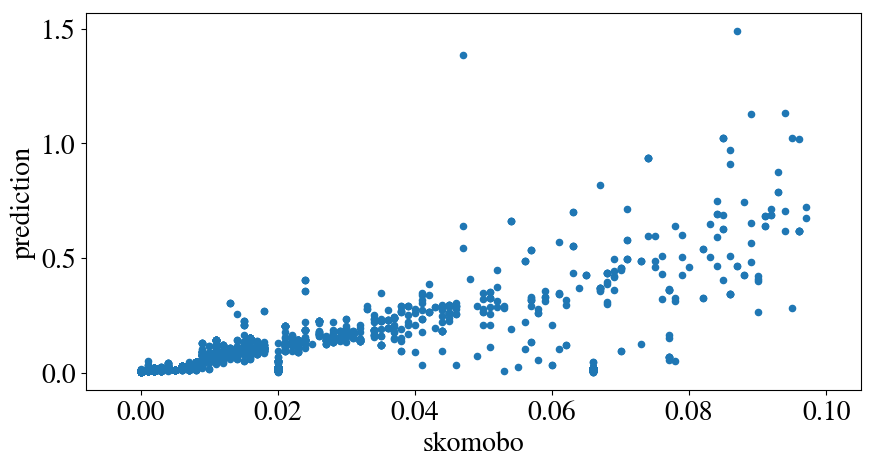

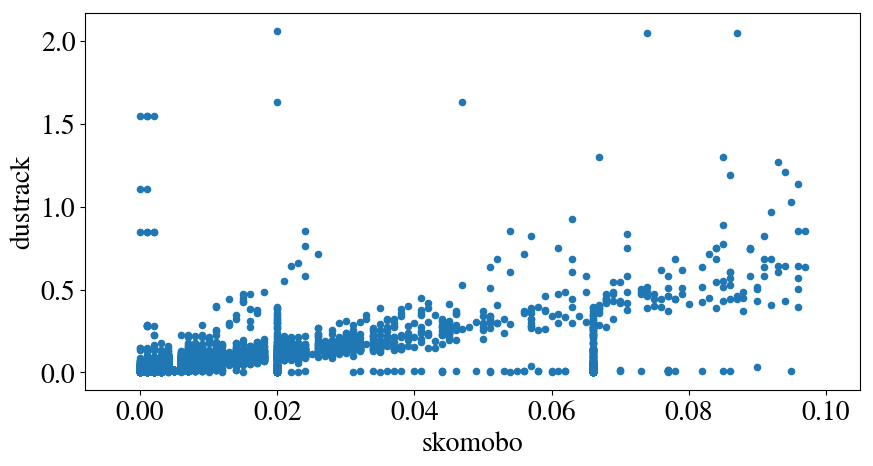

In [35]:
cleanTrainPM10.plot(x="skomobo", y="prediction", kind="scatter")
cleanTrainPM10.plot(x="skomobo", y="dustrack", kind="scatter")

In [39]:
cleanTrainPM10["clean_dust_diff"] = cleanTrainPM10["skomobo"] - cleanTrainPM10["skomobo"].shift(-1)
cleanTrainPM10 = cleanTrainPM10.fillna(0)

In [42]:
modelPM10 = BaggingRegressor(random_state=123).fit(cleanTrainPM10[["skomobo", "dust_diff", "clean_dust_diff"]], cleanTrainPM10["dustrack"])
modelPM10.score(cleanTrainPM10[["skomobo","dust_diff", "clean_dust_diff"]], cleanTrainPM10["dustrack"])

0.63889053311141253

In [43]:
cleanTrainPM10["prediction"] = modelPM10.predict(cleanTrainPM10[["skomobo", "dust_diff", "clean_dust_diff"]])

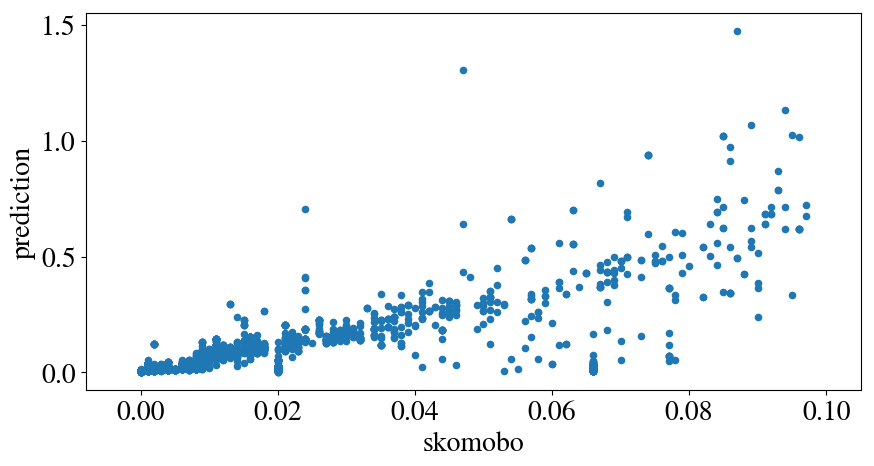

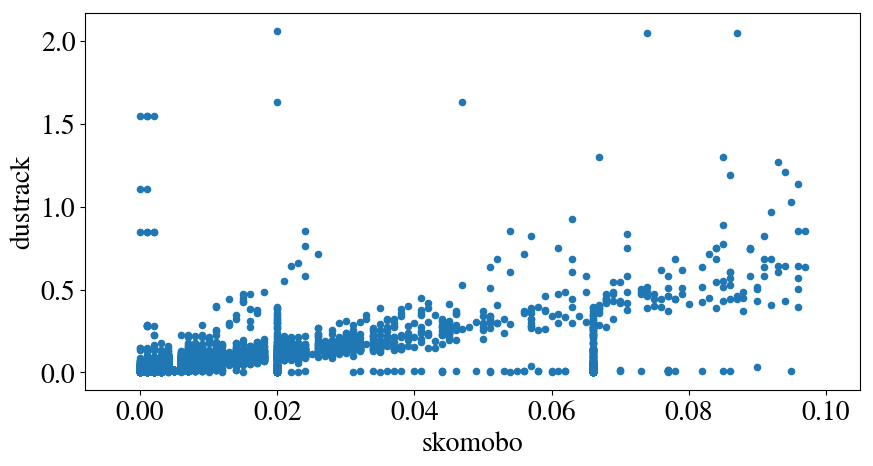

In [44]:
cleanTrainPM10.plot(x="skomobo", y="prediction", kind="scatter")
cleanTrainPM10.plot(x="skomobo", y="dustrack", kind="scatter")

In [45]:
from sklearn.neural_network import MLPRegressor

In [46]:
modelPM10 = MLPRegressor(random_state=123).fit(cleanTrainPM10[["skomobo", "dust_diff", "clean_dust_diff"]], cleanTrainPM10["dustrack"])
modelPM10.score(cleanTrainPM10[["skomobo","dust_diff", "clean_dust_diff"]], cleanTrainPM10["dustrack"])

0.05479151662713988

In [47]:
cleanTrainPM10["prediction"] = modelPM10.predict(cleanTrainPM10[["skomobo", "dust_diff", "clean_dust_diff"]])

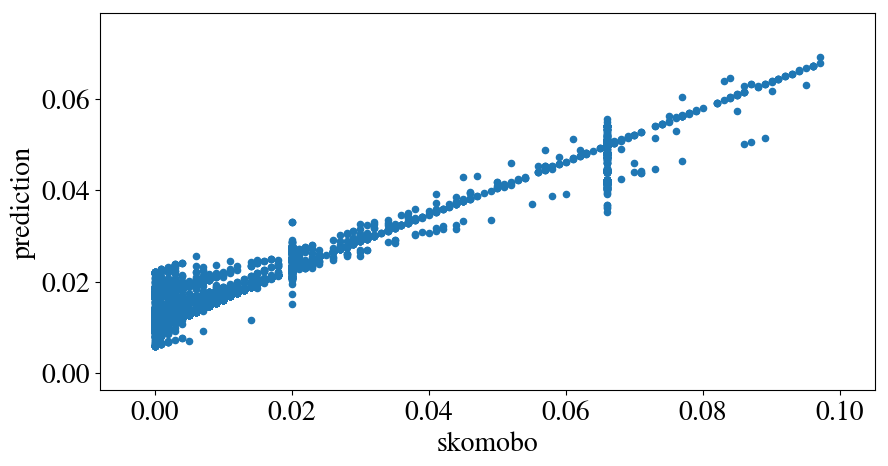

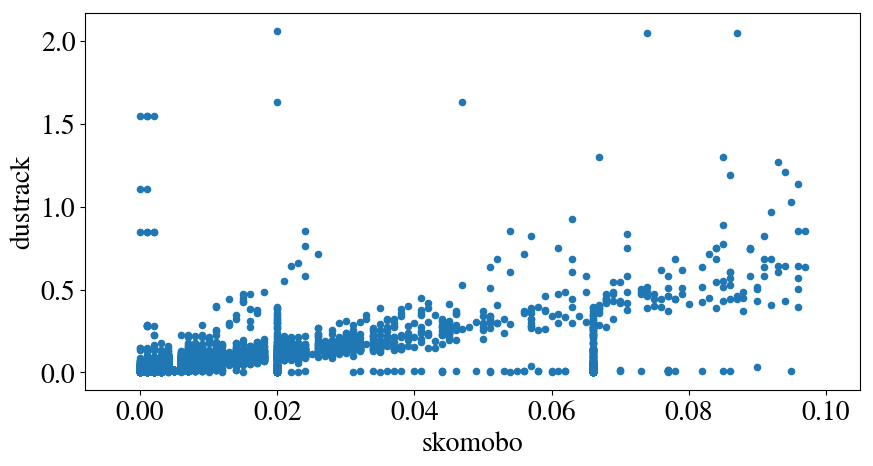

In [48]:
cleanTrainPM10.plot(x="skomobo", y="prediction", kind="scatter")
cleanTrainPM10.plot(x="skomobo", y="dustrack", kind="scatter")

In [42]:
modelPM10 = BaggingRegressor(random_state=123).fit(cleanTrainPM10[["skomobo", "dust_diff", "clean_dust_diff"]], cleanTrainPM10["dustrack"])
modelPM10.score(cleanTrainPM10[["skomobo","dust_diff", "clean_dust_diff"]], cleanTrainPM10["dustrack"])

0.63889053311141253

In [43]:
cleanTrainPM10["prediction"] = modelPM10.predict(cleanTrainPM10[["skomobo", "dust_diff", "clean_dust_diff"]])

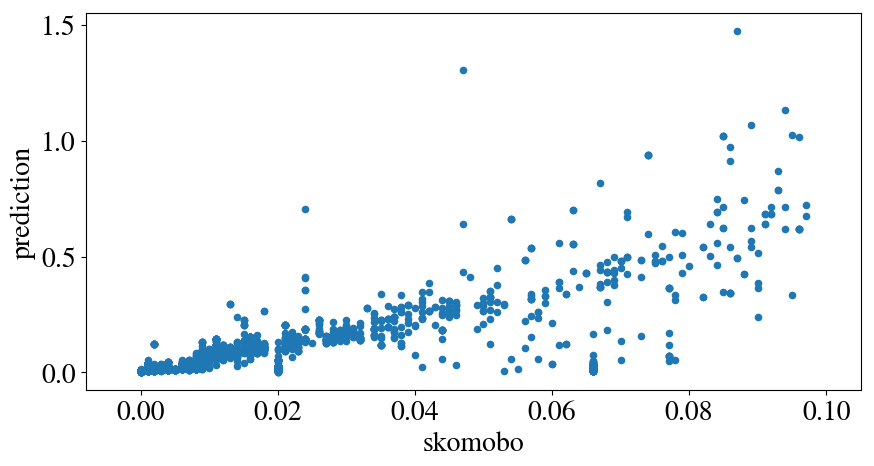

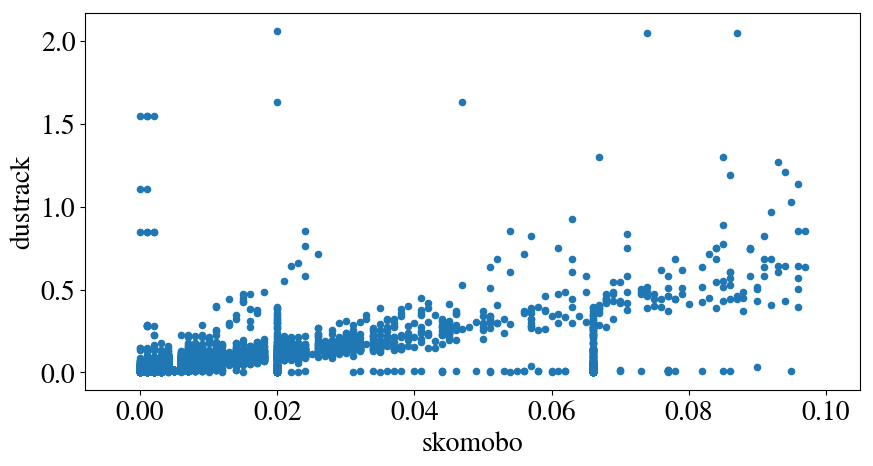

In [44]:
cleanTrainPM10.plot(x="skomobo", y="prediction", kind="scatter")
cleanTrainPM10.plot(x="skomobo", y="dustrack", kind="scatter")

In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
modelPM10 = LinearRegression().fit(cleanTrainPM10[["skomobo"]], cleanTrainPM10["dustrack"])
modelPM10.score(cleanTrainPM10[["skomobo"]], cleanTrainPM10["dustrack"])

0.057395387108590934

In [52]:
cleanTrainPM10["prediction"] = modelPM10.predict(cleanTrainPM10[["skomobo"]])

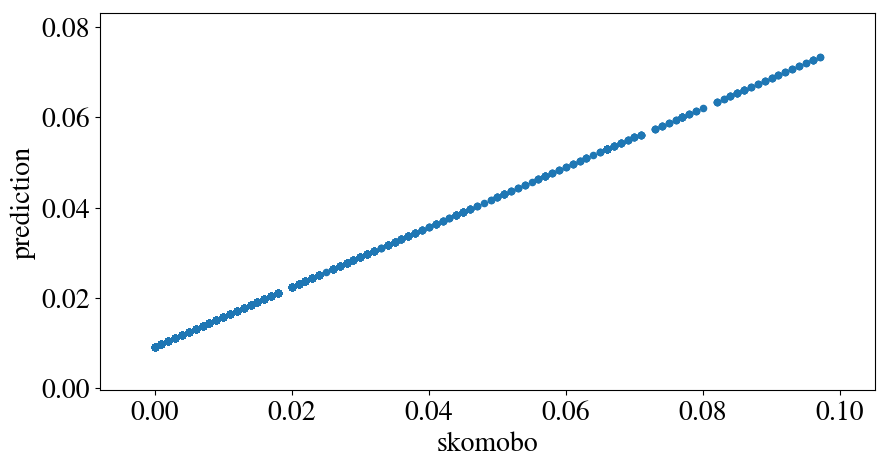

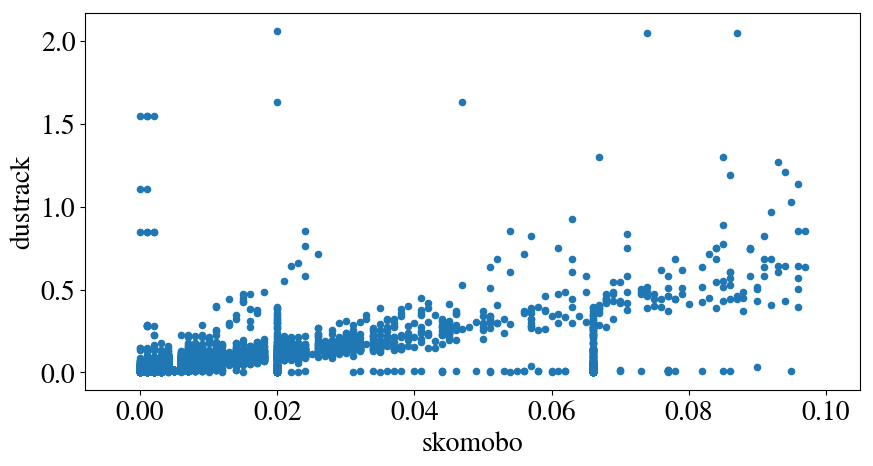

In [53]:
cleanTrainPM10.plot(x="skomobo", y="prediction", kind="scatter")
cleanTrainPM10.plot(x="skomobo", y="dustrack", kind="scatter")

In [54]:
from sklearn.ensemble import RandomForestRegressor

In [58]:
modelPM10 = RandomForestRegressor(random_state = 123).fit(cleanTrainPM10[["skomobo"]], cleanTrainPM10["dustrack"])
modelPM10.score(cleanTrainPM10[["skomobo"]], cleanTrainPM10["dustrack"])

0.5623935165659335

In [59]:
cleanTrainPM10["prediction"] = modelPM10.predict(cleanTrainPM10[["skomobo"]])

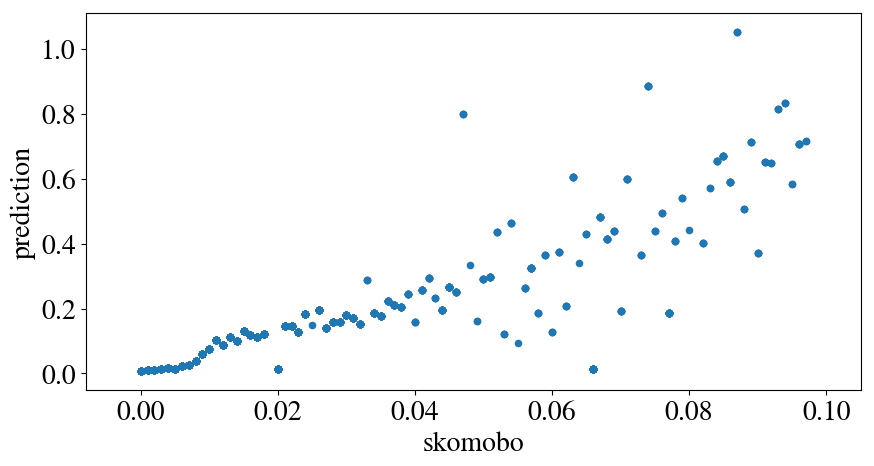

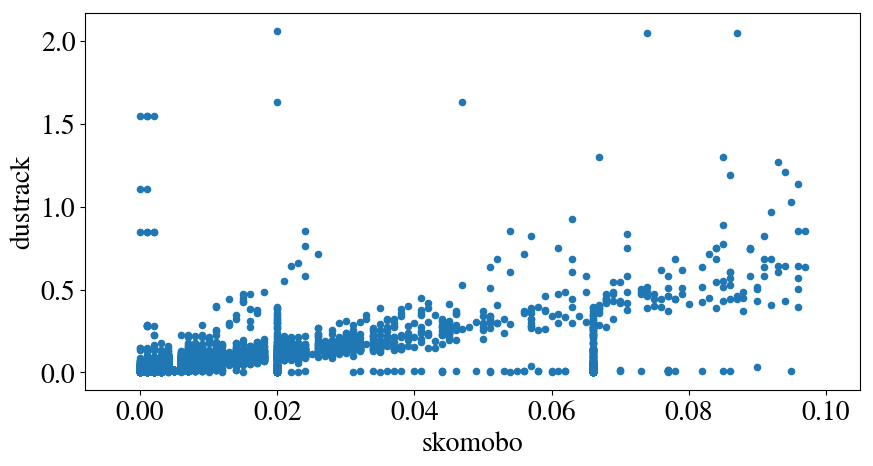

In [60]:
cleanTrainPM10.plot(x="skomobo", y="prediction", kind="scatter")
cleanTrainPM10.plot(x="skomobo", y="dustrack", kind="scatter")

# hopefully XG Boost works :)

In [61]:
import os

# mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-5.3.0-posix-seh-rt_v4-rev0\\mingw64\\bin'
mingw_path = 'C:\\Qt\Qt5.7.0\Tools\mingw530_32\bin'
os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']

In [62]:
import xgboost as xgb
import numpy as np

data = np.random.rand(5,10) # 5 entities, each contains 10 features
label = np.random.randint(2, size=5) # binary target
dtrain = xgb.DMatrix( data, label=label)

dtest = dtrain

param = {'bst:max_depth':2, 'bst:eta':1, 'silent':1, 'objective':'binary:logistic' }
param['nthread'] = 4
param['eval_metric'] = 'auc'

evallist  = [(dtest,'eval'), (dtrain,'train')]

num_round = 10
bst = xgb.train( param, dtrain, num_round, evallist )

bst.dump_model('dump.raw.txt')

C:\Users\Ryan\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


WindowsError: [Error 193] %1 is not a valid Win32 application